In [2]:
import numpy as np
from glob import glob as glob
import h5py
import inspect
import astropy
import matplotlib.pyplot as plt
from skylab.datasets import Datasets
import skylab.datasets
from matplotlib.colors import LogNorm
import os
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

In [3]:
import sys
sys.path.insert(1, '/home/apizzuto/Nova/scripts/')
from Novae import Nova

In [5]:
nov = Nova('testboi', -2.0, 0., 0., 58484.0, 30., cutoff=10)

In [6]:
mc = np.load('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/IC86_2012_mc.npy')

In [7]:
a, b = nov.calc_expected_signal(mc)
c, d = nov.calc_expected_signal(mc, cutoff = False)

plt.step(a, b, where = 'mid')
plt.step(c, d, where = 'mid')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-8, 1e3)
print(np.sum(b)),
print(np.sum(d))

AttributeError: 'Nova' object has no attribute 'calc_expected_signal'

In [5]:
data = np.load('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/IC86_2012_data.npy')
mc = np.load('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/IC86_2012_mc.npy')
grl = np.load('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/GRL/IC86_2012_data.npy')

Text(0,0.5,'$A_{eff}$')

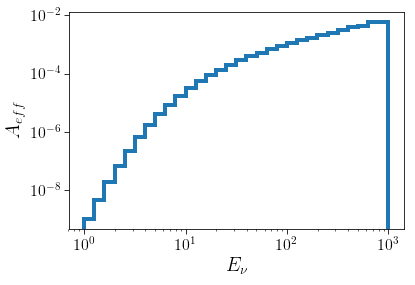

In [6]:
omega = 4. * np.pi
E_bins = np.logspace(0., 3., 31)
logE_bins = np.log10(E_bins)
dlog_E = np.diff(logE_bins)
weights = mc['ow'] / (1e4 * mc['trueE'] * dlog_E[np.digitize(np.log10(mc['trueE']), bins = logE_bins) -1] * omega * np.log(10.))
plt.hist(mc['trueE'], weights = weights, bins = E_bins, histtype = 'step', linewidth = 4.)
plt.loglog()
plt.xlabel(r'$E_{\nu}$', fontsize = 20)
plt.ylabel(r'$A_{eff}$', fontsize = 20)

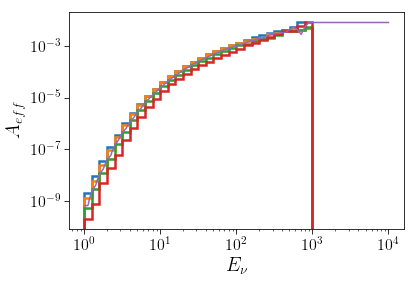

In [7]:
cz_bins = np.linspace(-1., 1., 5)
d_omega = 2. * np.pi * np.diff(cz_bins)
E_bins = np.logspace(0., 3., 31)
logE_bins = np.log10(E_bins)
dlog_E = np.diff(logE_bins)
for jj, (cb1, cb2) in enumerate(zip(cz_bins[:-1], cz_bins[1:])):
    mz = np.cos(mc['zen']) > cb1
    mz *= np.cos(mc['zen']) < cb2
    weights = mc['ow'][mz] / (1e4 * mc['trueE'][mz] * dlog_E[np.digitize(np.log10(mc['trueE'][mz]), bins = logE_bins) -1] * d_omega[jj] * np.log(10.))
    h = plt.hist(mc['trueE'][mz], weights = weights, bins = E_bins, 
             histtype = 'step', linewidth = 2.5, label = "")
    hh, bb = np.histogram(mc['trueE'][mz], weights = weights, bins = E_bins)
    
testens = np.logspace(0., 4., 500)
aeffs = nov.aeff(testens)
plt.plot(testens, aeffs)
    
plt.loglog()
plt.xlabel(r'$E_{\nu}$', fontsize = 20)
plt.ylabel(r'$A_{eff}$', fontsize = 20)
plt.show()

[]

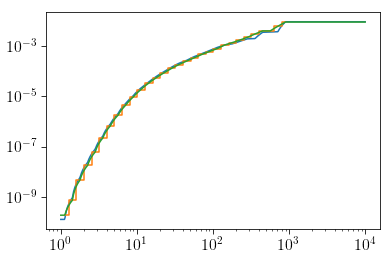

In [8]:
nov = Nova('testboi', -2.0, 0., np.radians(-40.), 58484.0, 30., cutoff=10)
testens = np.logspace(0., 4., 500)
aeffs = nov.aeff(testens)
#testens = np.logspace(0., 4., 500)
#inds = np.digitize(testens, bins = h[1]) - 1
#aeffs = [h[0][ind] if ind < 30 else h[0][-1] for ind in inds]
plt.plot(testens, aeffs)
mids = h[1][:-1] + (np.diff(h[1]) / 2.)
interpa = np.interp(testens, mids, h[0])
plt.step(mids, h[0], where = 'mid')
plt.plot(testens, interpa)
#othermids = bb[:-1] + (np.diff(bb) / 2.)
#plt.step(othermids, hh, where = 'mid')
plt.loglog()

hi


(1e-20, 1.0)

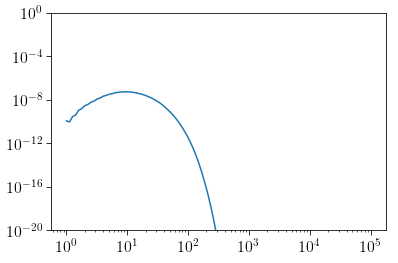

In [9]:
eee = np.logspace(0., 5., 100)
dnde = nov.calc_dNdE(np.logspace(0., 5., 100))
print('hi')
plt.plot(eee, dnde)
plt.loglog()
plt.ylim(1e-20, 1e0)

hi
2.390683202368983
2.344540446426922


(1e-20, 1.0)

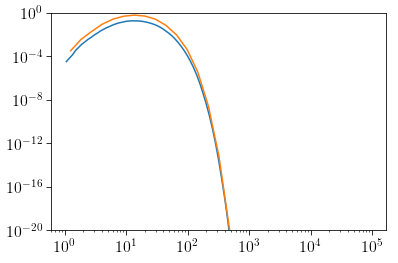

In [12]:
eee = np.logspace(0., 5., 100)
dnde = nov.calc_expected_signal_binned(eee, time_integrated=True)
bbb = np.logspace(0., 5., 30)
dnde_other = nov.calc_expected_signal_binned(bbb, time_integrated=True)
print('hi')
emids = eee[:-1] + (np.diff(eee) / 2.)
bmids = bbb[:-1] + (np.diff(bbb) / 2.)
plt.plot(emids, dnde[0])
plt.plot(bmids, dnde_other[0])
print(dnde[1])
print(dnde_other[1])
plt.loglog()
plt.ylim(1e-20, 1e0)

In [40]:
def aeff(en):
    if type(en) == float:
        ind = np.digitize(en, bins = h[1]) - 1
        if ind < len(h[0]):
            return h[0][ind] 
        else:
            return h[0][-1]
    else:
        inds = np.digitize(en, bins = h[1]) - 1
        aeffs = [h[0][ind] if ind < len(h[0]) else h[0][-1] for ind in inds]
        return aeffs

In [51]:
nov

In [38]:
len(h[0])

30

In [34]:
list(3.)

TypeError: 'float' object is not iterable

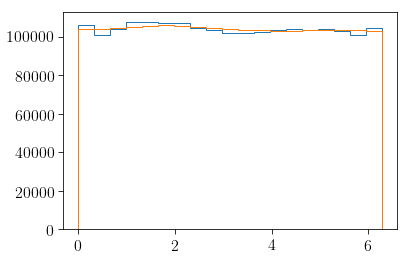

In [92]:
plt.hist(mc['ra'], bins = np.linspace(0., 2*np.pi, 20), histtype='step')
plt.hist(mc['trueRa'], bins = np.linspace(0., 2*np.pi, 20), histtype='step')

plt.show()

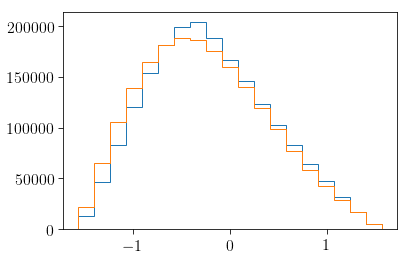

In [93]:
plt.hist(mc['dec'], bins = np.linspace(-np.pi / 2., np.pi/2., 20), histtype='step')
plt.hist(mc['trueDec'], bins = np.linspace(-np.pi / 2., np.pi/2., 20), histtype='step')

plt.show()

[]

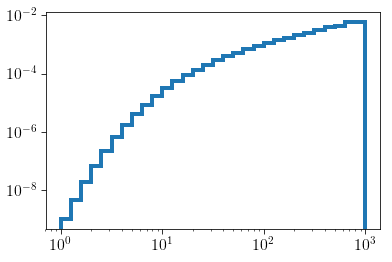

In [75]:
plt.hist(mc['trueE'], weights = weights, bins = E_bins, histtype = 'step', linewidth = 4.)
plt.loglog()

In [76]:
mc

array([(12640, 1, 1, 1., 0.12958934,  0.98083298, 0.12958934, 0.58996334, 2.0943951, 1.02082786,  3.6862545 , 5.66582003,  0.62122191, 3.10329384e-06),
       (12640, 1, 1, 1., 0.58225176, -0.02828754, 0.58225176, 1.59908386, 2.0943951, 0.34635297,  3.94487443, 5.75016876,  0.06524964, 4.28948724e-06),
       (12640, 1, 1, 1., 0.50864295, -0.72686712, 0.50864295, 2.29766345, 2.0943951, 0.58806073,  2.18886908, 5.86928344, -1.33029228, 8.02032820e-07),
       ...,
       (16640, 1, 1, 1., 0.12640035, -0.92888683, 0.12640035, 2.49968315, 2.0943951, 1.47317855, 31.14773078, 1.38744935, -1.35978463, 1.86443733e-03),
       (16640, 1, 1, 1., 3.69769791,  0.47152365, 3.69769791, 1.09927267, 2.0943951, 1.19877272, 54.98433078, 0.25899604, -0.18916696, 2.10231955e-02),
       (16640, 1, 1, 1., 2.71329058, -0.85143268, 2.71329058, 2.422229  , 2.0943951, 1.58043401, 60.37949968, 5.55037186, -1.00492439, 4.03228547e-02)],
      dtype=[('run', '<i8'), ('event', '<i8'), ('subevent', '<i8'), ('time'

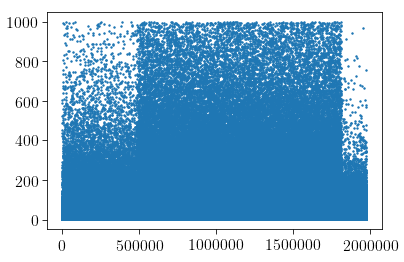

In [31]:
plt.scatter(np.arange(len(mc['trueE'])), mc['trueE'], s = 2)

In [ ]:
plt.hist(mc['trueE'], bins = E_bins, weights = weights)
plt.loglog()

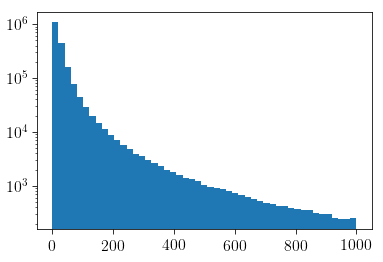

In [9]:
lb = np.linspace(1., 1000., 50)
plt.hist(mc['trueE'], bins = lb)
plt.yscale('log')

(array([      0.,       0.,       0.,       0.,       0., 1976521.,
              0.,       0.,       0.,       0.]),
 array([1.5943951, 1.6943951, 1.7943951, 1.8943951, 1.9943951, 2.0943951,
        2.1943951, 2.2943951, 2.3943951, 2.4943951, 2.5943951]),
 <a list of 10 Patch objects>)

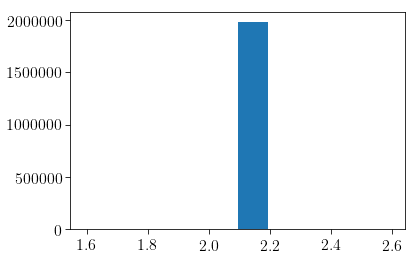

In [10]:
plt.hist(mc['angErr'])

(array([    0.,     0.,     0.,     0.,     0., 39108.,     0.,     0.,
            0.,     0.]),
 array([1.5943951, 1.6943951, 1.7943951, 1.8943951, 1.9943951, 2.0943951,
        2.1943951, 2.2943951, 2.3943951, 2.4943951, 2.5943951]),
 <a list of 10 Patch objects>)

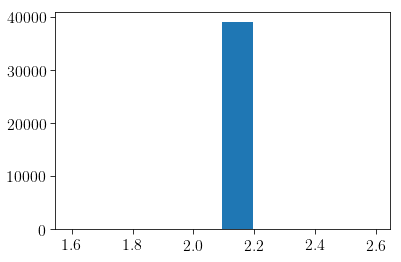

In [11]:
plt.hist(data['angErr'])

In [14]:
len(np.diff(np.linspace(1., 100, 100)))

99